<a href="https://colab.research.google.com/github/ychengbf/ECON441B/blob/main/HW_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
X_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

In [27]:
principal_components = pca.components_
print("The first principal component: ", principal_components[0])
print("The second principal component: ", principal_components[1])

The first principal component:  [-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
  0.42583938 -0.40372896  0.39264482]
The second principal component:  [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
 -0.22270674  0.15523311 -0.0460224 ]


# 2.) Plot a Scatter plot of the PCs on the axis

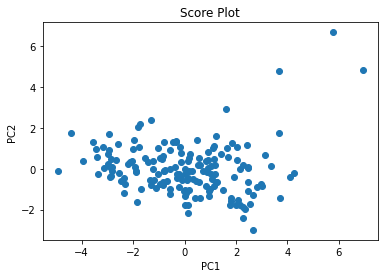

In [11]:
plt.scatter(x= X_pca[:,0],y=X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [12]:
loadings = pca.components_
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [13]:
feature_names = df.columns[1:]

In [14]:
feature_importance = pd.DataFrame(np.sum(loadings**2, axis = 0))

In [15]:
feature_names.index = feature_names
feature_importance.sort_values(0,ascending=False)

,0
3,0.477420
1,0.456567
6,0.230937
0,0.213201
7,0.187094
4,0.159263
8,0.156288
2,0.081843
5,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [16]:
feature_names = df.columns[1:]

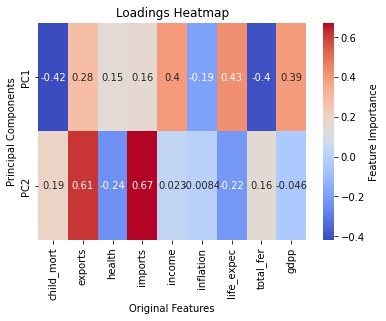

In [29]:
#sns.heatmap(, annot=, cmap='coolwarm', xticklabels=, yticklabels=[, ], cbar_kws={'label':'Feature Importance'})

sns.heatmap(loadings, annot = True, cmap='coolwarm', xticklabels=feature_names, yticklabels = ['PC1','PC2'], cbar_kws={'label': 'Feature Importance'})
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

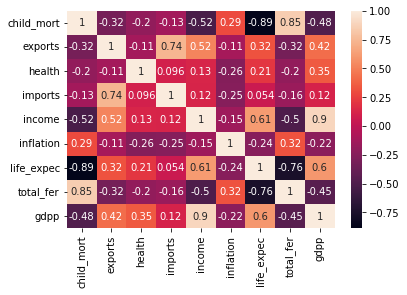

In [26]:
sns.heatmap(X.corr(),annot = True)
plt.plot()

In [30]:
# In graph 4, for pc1, 'income','life_expec','children mortality', 'total fertaility','gdpp' have higher absolute loadings which means that
# they are the most important contributors to that principal component 1. 
# While 'export','health','import','life expec' have higher absolute loadings which means that they are the most important contributors 
# to that principal component 2.

# From the correlation plot, I find some overlap between the two plot but they are not identical.
# Besides, features that are highly correlated with each other tend to have similar loadings on the same principal component. e.g. 'child_morta' and 'total_fert'
# Clusters of features with high loadings on certain principal components in the loading heatmap, 
# and these clusters may correspond to groups of highly correlated features in the correlation graph.

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [22]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

In [31]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

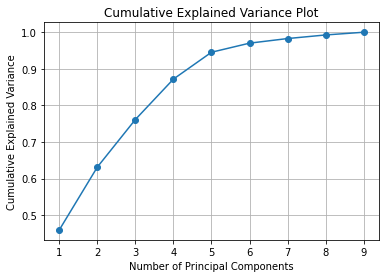

In [33]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [34]:
# In this case, we need 5 PCs to retain 95% of the variance